In [5]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares
import numpy
from os import listdir

In [6]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [7]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 12,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}"     # xcolor for colours
}
matplotlib.rcParams.update(pgf_with_latex)

In [8]:
for i, file in enumerate(listdir("/Volumes/SBHDD1TB/data/merged/inbending/")):
    print(i, file)
    df = pd.read_pickle("/Volumes/SBHDD1TB/data/merged/inbending/" + file)
    if i > 0:
#         inb_FD = pd.concat([df.loc[df.Psector < 4000, ["PDc1Hitx", "PDc1Hity", "PDc1Hitz", "Etheta", "Ep", "GenEp", "Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi"]], inb_FD])
#         inb_FD = pd.concat([df.loc[df.Psector < 4000, ["PDc1Hitx", "PDc1Hity", "PDc1Hitz", "Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi"]], inb_FD])
#         inb_CD = pd.concat([df.loc[df.Psector > 4000, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi"]], inb_CD])
        inb_FD_corr = pd.concat([df.loc[df.Psector < 4000, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi", "MM2_ep", "MM2_epg"]], inb_FD_corr])
        inb_CD_corr = pd.concat([df.loc[df.Psector > 4000, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi", "MM2_ep", "MM2_epg"]], inb_CD_corr])
    else:
#         inb_FD = df.loc[df.Psector < 4000, ["PDc1Hitx", "PDc1Hity", "PDc1Hitz", "Etheta", "Ep", "GenEp", "Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi"]]
#         inb_FD = df.loc[df.Psector < 4000, ["PDc1Hitx", "PDc1Hity", "PDc1Hitz", "Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi"]]
#         inb_CD = df.loc[df.Psector > 4000, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi"]]
        inb_FD_corr = df.loc[df.Psector < 4000, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi", "MM2_ep", "MM2_epg"]]
        inb_CD_corr = df.loc[df.Psector > 4000, ["Pp", "Ptheta", "Pphi", "GenPp", "GenPtheta", "GenPphi", "MM2_ep", "MM2_epg"]]
#         break

0 2942.pkl
1 2966.pkl
2 2967.pkl
3 3057.pkl
4 3059.pkl
5 3061.pkl
6 3062.pkl
7 3063.pkl
8 3066.pkl
9 3067.pkl
10 3073.pkl
11 3075.pkl
12 3100.pkl
13 3108.pkl


<AxesSubplot:>

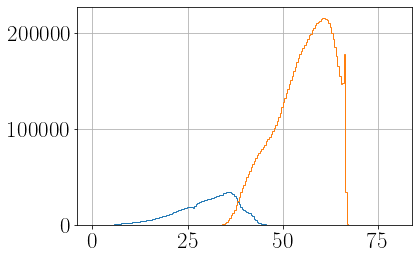

In [15]:
inb_FD_corr.Ptheta.hist(bins = np.linspace(0, 80, 201), histtype = 'step')
inb_CD_corr.Ptheta.hist(bins = np.linspace(0, 80, 201), histtype = 'step')

In [20]:
inb_CD_corr

,Pp,Ptheta,Pphi,GenPp,GenPtheta,GenPphi,MM2_ep,MM2_epg
0,0.851117,54.941867,87.310899,0.856393,55.334734,87.493841,0.122452,0.000187
1,0.756341,56.509823,-49.474251,0.765733,56.494276,-49.401627,-0.007873,0.000088
2,0.838800,60.829503,72.785283,0.829862,60.257270,72.555845,-0.123626,-0.001107
4,0.820997,53.455547,-132.030322,0.835710,53.525528,-131.923839,0.042663,0.000005
5,0.594454,60.676347,39.692628,0.577274,60.518649,39.493167,-0.016945,-0.000537
...,...,...,...,...,...,...,...,...
794245,0.442661,40.138237,-140.178604,0.479495,38.414779,-141.172001,-0.200302,-0.003869
794246,0.338720,59.344169,90.743950,0.407418,59.757603,93.534702,-0.157770,-0.000830
794247,0.577725,64.732538,71.586693,0.559552,64.465202,71.249256,-0.057785,-0.003807
794248,1.492303,38.476555,-162.959283,1.461525,38.882618,-163.139248,-0.003069,-0.001482
